# punto1


In [478]:

import math
import itertools
import numpy as np
import pylab as pl
import pandas as pd
import time
import gc
import matplotlib.pyplot as plt
import scipy
from __future__ import unicode_literals
%matplotlib inline

In [479]:

def insertion_sort(A):
    time1=time.clock()
    j=1
    while j < len(A):
        pos = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > pos):
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = pos
        j += 1
    return time.clock()-time1

In [480]:
a=[3,4,5,6]
insertion_sort(a)

0.0001256205068784766

calculo de tiempo para el mejor caso 

In [481]:
def calc_timemejor( n):
    timesum = 0
    gc.collect()
    for i in range(1000):
        ordenada=range(1,n+1)
    
        timesum+=insertion_sort(ordenada)
        
    return (timesum/1000)

claculo de tiempo para el peor caso 

In [483]:
def calc_timepeor( n):
    
    timesum = 0
    gc.collect()
   
    for i in range(1000):
        desordenada=range(n,0,-1)
        
        timesum+=insertion_sort(desordenada)
        
    return (timesum/1000)

In [ ]:
calculo de tiempo para el caso promedio para todas las permutaciones

In [485]:
def calc_timemedio(n):
 
    medio=0
    tam=0
    timesum=0
    gc.collect()
    lista=range(1,n+1)
    for i in range(1000):
        for p in itertools.permutations(lista):
            medio+=insertion_sort(list(p))
            tam+=1
        timesum+=(medio/tam)
        
    return (timesum/1000)
            

mejores

In [487]:
mejores=[]
mejor4=calc_timemejor(4)
mejor5=calc_timemejor(5)
mejor6=calc_timemejor(6)
mejores.append(mejor4)
mejores.append(mejor5)
mejores.append(mejor6)
print mejores

[4.808063313248567e-06, 5.84094308760541e-06, 6.765444362827111e-06]


peores

In [488]:
peores=[]
peores.append(calc_timepeor(4))
peores.append(calc_timepeor(5))
peores.append(calc_timepeor(6))
print peores


[1.0728237701187026e-05, 1.4538315856043483e-05, 2.1717979494496832e-05]


promedios

In [489]:
promedios=[]
promedios.append( calc_timemedio(4))
promedios.append( calc_timemedio(5))
promedios.append( calc_timemedio(6))
print promedios

[6.567562252454905e-06, 9.537487479520194e-06, 1.2177435859404138e-05]


Grafica de interpolacion

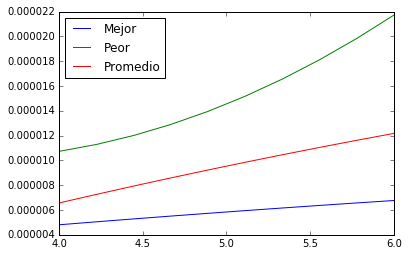

In [490]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math

x = np.linspace(4,6,3,endpoint=True)
x2 = np.linspace(4,6,10,endpoint=True)

f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

#plt.plot(x,mejores,x,peores,x,promedios)
plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor','Peor','Promedio'],loc='best')